# import data using alpha_vantage

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='MDZX2M4H6HCXRU53')
# Get json object with the intraday data and another with  the call's metadata


In [2]:
data, meta_data = ts.get_intraday('GOOGL')

In [3]:
from alpha_vantage.timeseries import TimeSeries
from pprint import pprint
ts = TimeSeries(key='MDZX2M4H6HCXRU53', output_format='pandas')
data, meta_data = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='full')
data

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2023-02-13 20:00:00,272.20,272.24,272.20,272.24,4826.0
2023-02-13 19:59:00,272.01,272.20,272.00,272.20,3142.0
2023-02-13 19:58:00,271.78,272.00,271.78,272.00,9853.0
2023-02-13 19:57:00,271.77,271.80,271.77,271.80,1227.0
2023-02-13 19:56:00,271.56,271.75,271.56,271.75,3855.0
...,...,...,...,...,...
2023-01-31 04:05:00,241.53,241.53,241.52,241.52,626.0
2023-01-31 04:04:00,241.85,241.85,241.57,241.57,801.0
2023-01-31 04:03:00,241.52,241.52,241.52,241.52,218.0


In [4]:
data1=data.reset_index()

In [5]:
data1.columns

Index(['date', '1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')

# indicator1 function

In [6]:
def indicator1(df,timeperiod):
    df1=df.iloc[:,[0,4]]
    df1.rename(columns = {'date':'timestamp'} ,inplace=True)
    df1['4. close']= df1['4. close'].to_frame()
 
    df1['indicator'] = df1['4. close'].rolling(timeperiod).mean()
    df1=df1.drop(['4. close'],axis=1)

    return df1
    
    

In [7]:
indicator1(data1,5)

,timestamp,indicator
0,2023-02-13 20:00:00,NaN
1,2023-02-13 19:59:00,NaN
2,2023-02-13 19:58:00,NaN
3,2023-02-13 19:57:00,NaN
4,2023-02-13 19:56:00,271.998
...,...,...
7378,2023-01-31 04:05:00,241.634
7379,2023-01-31 04:04:00,241.610
7380,2023-01-31 04:03:00,241.576
7381,2023-01-31 04:02:00,241.574


In [8]:
df2=indicator1(data1,5).dropna()

In [9]:
df3=data1.iloc[4: ,4]

In [10]:
df4 = pd.concat([df2, df3], axis=1)
df4

,timestamp,indicator,4. close
4,2023-02-13 19:56:00,271.998,271.75
5,2023-02-13 19:55:00,271.882,271.66
6,2023-02-13 19:54:00,271.790,271.74
7,2023-02-13 19:53:00,271.722,271.66
8,2023-02-13 19:52:00,271.692,271.65
...,...,...,...
7378,2023-01-31 04:05:00,241.634,241.52
7379,2023-01-31 04:04:00,241.610,241.57
7380,2023-01-31 04:03:00,241.576,241.52
7381,2023-01-31 04:02:00,241.574,241.66


# Creating signal dataframe

In [11]:
l=list(df4['indicator'])
m=list(df4['4. close'])
signal=[]
for i in range(7379):
    if l[i]>m[i]:
        signal.append('BUY')
    elif l[i]<m[i]:
        signal.append('SELL')
    else:
        signal.append('N0_SIGNAL')

In [12]:
df4['signal']=signal
df5=df4.drop(['indicator','4. close'],axis=1)
df5

,timestamp,signal
4,2023-02-13 19:56:00,BUY
5,2023-02-13 19:55:00,BUY
6,2023-02-13 19:54:00,BUY
7,2023-02-13 19:53:00,BUY
8,2023-02-13 19:52:00,BUY
...,...,...
7378,2023-01-31 04:05:00,BUY
7379,2023-01-31 04:04:00,BUY
7380,2023-01-31 04:03:00,BUY
7381,2023-01-31 04:02:00,SELL


# candlestick chart using mplfinance

In [13]:
data2=data
data2.rename(columns = {'1. open':'open','2. high':'high','3. low':'low','4. close':'close','5. volume':'volume'}, inplace = True)

In [31]:
data2

,open,high,low,close,volume
date,,,,,
2023-02-13 20:00:00,272.20,272.24,272.20,272.24,4826.0
2023-02-13 19:59:00,272.01,272.20,272.00,272.20,3142.0
2023-02-13 19:58:00,271.78,272.00,271.78,272.00,9853.0
2023-02-13 19:57:00,271.77,271.80,271.77,271.80,1227.0
2023-02-13 19:56:00,271.56,271.75,271.56,271.75,3855.0
...,...,...,...,...,...
2023-01-31 04:05:00,241.53,241.53,241.52,241.52,626.0
2023-01-31 04:04:00,241.85,241.85,241.57,241.57,801.0
2023-01-31 04:03:00,241.52,241.52,241.52,241.52,218.0


In [46]:
data3=data2.reset_index()
data4=data3.iloc[0:100,:]
data4=data4.set_index('date')

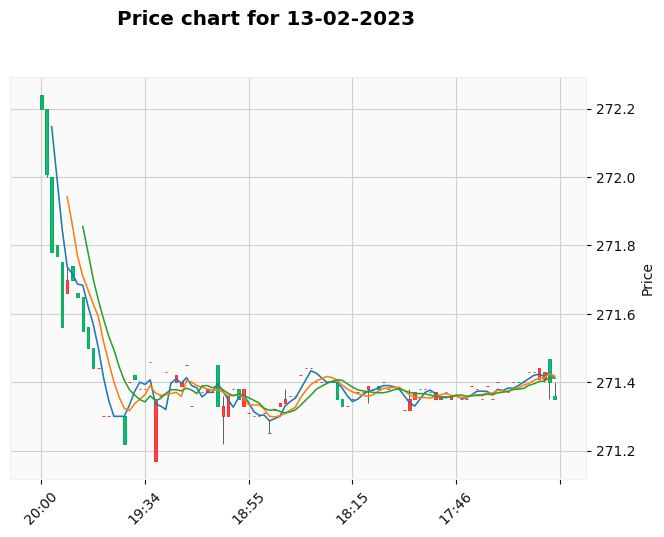

In [48]:
import mplfinance as mpl 
mpl.plot(
    data4,
    type="candle", 
    mav =(3,6,9),
    title = "Price chart for 13-02-2023",  
    style="yahoo"
    )